In [1]:
# Simple for loop to check if python3 is working.
for x in range(1, 5):  # If you ever see xrange, you are in Python 2
    print(x)  # If you ever see print x (no parenthesis), you are in Python 2

1
2
3
4


In [2]:
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
except:
    print("Note: not using Google CoLab")
    COLAB = False

Mounted at /content/drive
Note: using Google CoLab


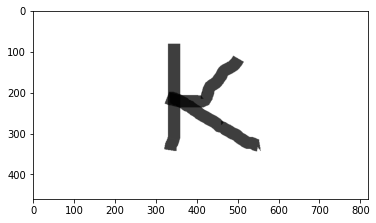

In [4]:
#https://www.youtube.com/watch?v=j-3vuBynnOE

#pip install opencv-pythonimport tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import os
import cv2

DATADIR = "/content/drive/My Drive/Colab Notebooks/CK/"
#CATEGORIES = ["O", "Other"]
CATEGORIES = ["c", "k"]
#CATEGORIES = ["X"]
#CATEGORIES = ["X", "Other"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            plt.imshow(img_array, cmap="gray")
        except Exception as e:
            pass


In [7]:
!ls /content/drive/My\ Drive/Colab\ Notebooks

 CK  'HW4_19702_Huda(1).ipynb'	 HW4-19702-Huda.ipynb   XandO


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random

#DATADIR = "./train/"
#CATEGORIES = ["Jibril", "Sulayman"]
#DATADIR = "./XandO/"
#CATEGORIES = ["X", "O"]
#DATADIR = "./kagglecatsanddogs_3367a/PetImages"
#DATADIR = "./kagglecatsanddogs_small/PetImages"
#CATEGORIES = ["Dog", "Cat"]


IMG_SIZE = 50

training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

create_training_data()
print(len(training_data))

random.shuffle(training_data)

#for sample in training_data:
#    print(sample[1])

X=[]
Y=[]
for features, label in training_data:
    X.append(features)
    Y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE,1)
Y = np.array(Y)
X = X/255.0
#print (X)

67


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
#import pickle

#X=pickle.load(open("X.pickle", "rb"))
#Y = pickle.load(open("Y.pickle","rb"))
#print(X)

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)
print("X.shape=",X.shape)
print("x_train.shape=",x_train.shape)
print("y_train.shape=",y_train.shape)
print("x_test.shape=",x_test.shape)
print("y_test.shape=",y_test.shape)

callback = EarlyStopping(monitor='val_loss', patience=5)
# This callback will stop the training when there is no improvement in
# the validation loss for five consecutive epochs.

model = Sequential()

#model.add(Conv2D(14,(3,3),input_shape=X.shape[1:]))
model.add(Conv2D(7,(3,3),input_shape=x_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#model.add(Conv2D(14,(3,3)))
model.add(Conv2D(7,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])
#model.fit(x_train, y_train,batch_size=32,epochs=500,callbacks=[callback],validation_data=(x_test,y_test))
model.fit(x_train, y_train,batch_size=20,epochs=30,validation_data=(x_test,y_test),verbose=2)


X.shape= (67, 50, 50, 1)
x_train.shape= (53, 50, 50, 1)
y_train.shape= (53,)
x_test.shape= (14, 50, 50, 1)
y_test.shape= (14,)
Epoch 1/30
3/3 - 2s - loss: 0.8356 - accuracy: 0.4717 - val_loss: 0.7104 - val_accuracy: 0.4286
Epoch 2/30
3/3 - 0s - loss: 0.7181 - accuracy: 0.4906 - val_loss: 0.7805 - val_accuracy: 0.4286
Epoch 3/30
3/3 - 0s - loss: 0.6779 - accuracy: 0.5472 - val_loss: 0.6768 - val_accuracy: 0.6429
Epoch 4/30
3/3 - 0s - loss: 0.7508 - accuracy: 0.4528 - val_loss: 0.6640 - val_accuracy: 0.5714
Epoch 5/30
3/3 - 0s - loss: 0.6909 - accuracy: 0.4906 - val_loss: 0.6928 - val_accuracy: 0.4286
Epoch 6/30
3/3 - 0s - loss: 0.6974 - accuracy: 0.5283 - val_loss: 0.7401 - val_accuracy: 0.4286
Epoch 7/30
3/3 - 0s - loss: 0.7071 - accuracy: 0.4906 - val_loss: 0.6546 - val_accuracy: 0.4286
Epoch 8/30
3/3 - 0s - loss: 0.6414 - accuracy: 0.5660 - val_loss: 0.6232 - val_accuracy: 0.7857
Epoch 9/30
3/3 - 0s - loss: 0.6000 - accuracy: 0.8113 - val_loss: 0.6059 - val_accuracy: 0.8571
Epoch 10/

14


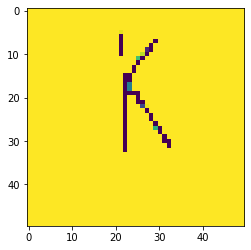

predicted label: [0.9800267]
actual label: 1
The image is correctly classified


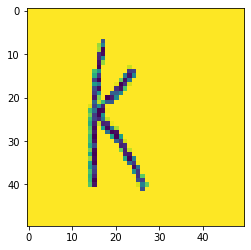

predicted label: [0.9245113]
actual label: 1
The image is correctly classified


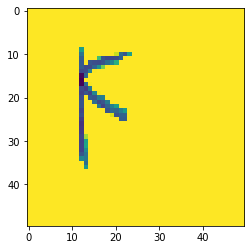

predicted label: [0.9717525]
actual label: 1
The image is correctly classified


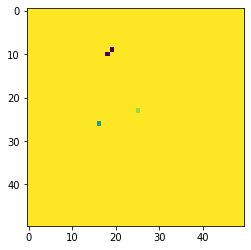

predicted label: [0.60820794]
actual label: 0
The image is misclassified


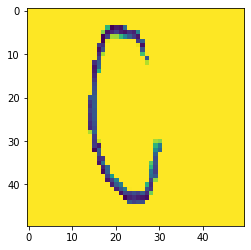

predicted label: [0.00168347]
actual label: 0
The image is correctly classified


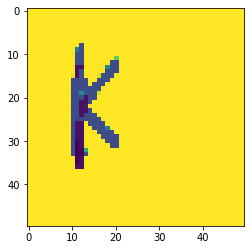

predicted label: [0.9598762]
actual label: 1
The image is correctly classified


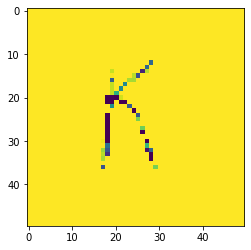

predicted label: [0.9834347]
actual label: 1
The image is correctly classified


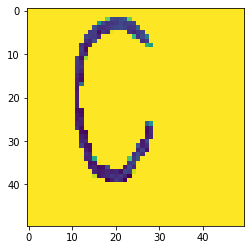

predicted label: [0.00190142]
actual label: 0
The image is correctly classified


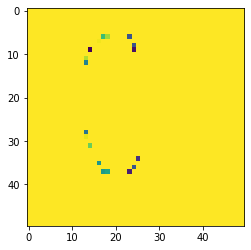

predicted label: [0.32922888]
actual label: 0
The image is correctly classified


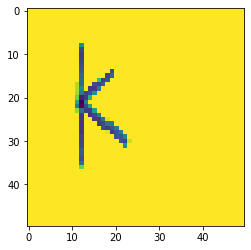

predicted label: [0.9672542]
actual label: 1
The image is correctly classified


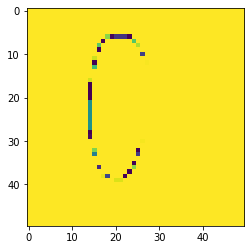

predicted label: [0.03654039]
actual label: 0
The image is correctly classified


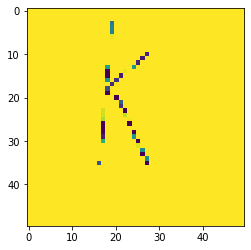

predicted label: [0.9393668]
actual label: 1
The image is correctly classified


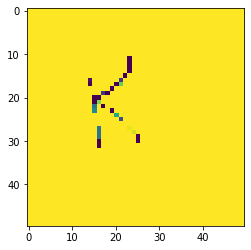

predicted label: [0.98870647]
actual label: 1
The image is correctly classified


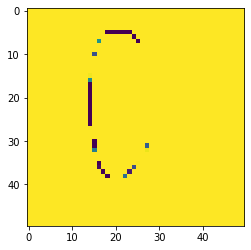

predicted label: [0.01542047]
actual label: 0
The image is correctly classified


In [10]:
#This codeblock runs the given architecture

import matplotlib.pyplot as plt
arr = model.predict(x_test)
print(len(arr))
for count in range(len(arr)):
  plt.imshow(x_test[count].reshape(50,50))
  plt.show()
  predicted = arr[count]
  actual = y_test[count]
  print("predicted label:",predicted)
  print("actual label:",actual)
  if((actual==0 and (predicted<=0.5 and predicted>=0)) or (actual==1 and (predicted>=0.5 and predicted<=1))):
    print("The image is correctly classified")
  else:
    print("The image is misclassified")

In [11]:
#experiment cnn 1
#modifying the above code

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)
callback = EarlyStopping(monitor='val_loss', patience=5)

model = Sequential()

model.add(Conv2D(64,(3,3),input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128))

model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="mean_squared_error",
              optimizer="adam",
              metrics=['accuracy'])

model.fit(x_train, y_train,batch_size=12,epochs=55,validation_data=(x_test,y_test),verbose=2)

Epoch 1/55
5/5 - 1s - loss: 0.2611 - accuracy: 0.3585 - val_loss: 0.2467 - val_accuracy: 0.5714
Epoch 2/55
5/5 - 0s - loss: 0.2518 - accuracy: 0.4528 - val_loss: 0.2460 - val_accuracy: 0.5714
Epoch 3/55
5/5 - 0s - loss: 0.2497 - accuracy: 0.5472 - val_loss: 0.2475 - val_accuracy: 1.0000
Epoch 4/55
5/5 - 0s - loss: 0.2479 - accuracy: 0.5660 - val_loss: 0.2453 - val_accuracy: 1.0000
Epoch 5/55
5/5 - 0s - loss: 0.2488 - accuracy: 0.5283 - val_loss: 0.2458 - val_accuracy: 0.4286
Epoch 6/55
5/5 - 0s - loss: 0.2498 - accuracy: 0.5283 - val_loss: 0.2501 - val_accuracy: 0.4286
Epoch 7/55
5/5 - 0s - loss: 0.2407 - accuracy: 0.6415 - val_loss: 0.2247 - val_accuracy: 1.0000
Epoch 8/55
5/5 - 0s - loss: 0.2213 - accuracy: 0.9057 - val_loss: 0.1827 - val_accuracy: 1.0000
Epoch 9/55
5/5 - 0s - loss: 0.1750 - accuracy: 0.9245 - val_loss: 0.0947 - val_accuracy: 1.0000
Epoch 10/55
5/5 - 0s - loss: 0.0968 - accuracy: 0.9623 - val_loss: 0.0379 - val_accuracy: 1.0000
Epoch 11/55
5/5 - 0s - loss: 0.0647 - a

14


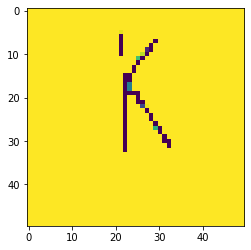

predicted label: [0.9999801]
actual label: 1
The image is correctly classified


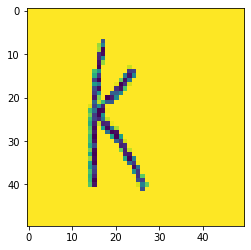

predicted label: [1.]
actual label: 1
The image is correctly classified


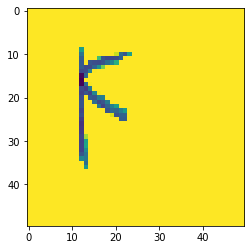

predicted label: [0.99999726]
actual label: 1
The image is correctly classified


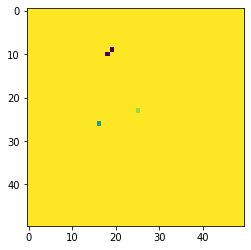

predicted label: [0.5261645]
actual label: 0
The image is misclassified


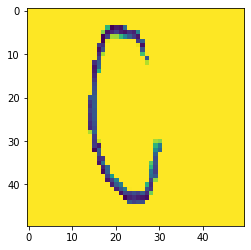

predicted label: [5.860942e-08]
actual label: 0
The image is correctly classified


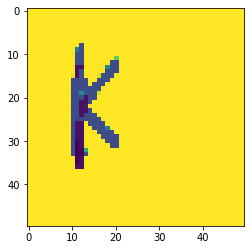

predicted label: [0.9999896]
actual label: 1
The image is correctly classified


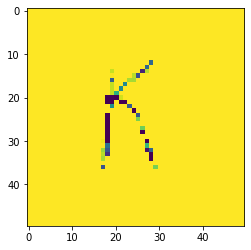

predicted label: [0.9999957]
actual label: 1
The image is correctly classified


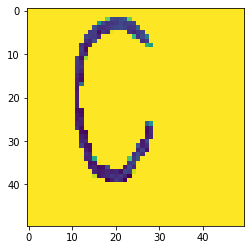

predicted label: [6.2841976e-10]
actual label: 0
The image is correctly classified


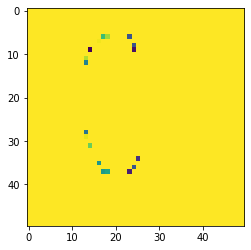

predicted label: [0.00074524]
actual label: 0
The image is correctly classified


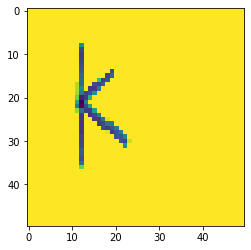

predicted label: [0.9999956]
actual label: 1
The image is correctly classified


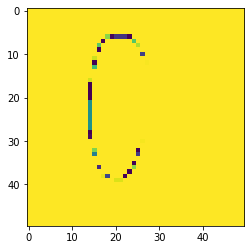

predicted label: [8.762326e-08]
actual label: 0
The image is correctly classified


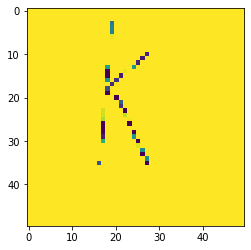

predicted label: [1.]
actual label: 1
The image is correctly classified


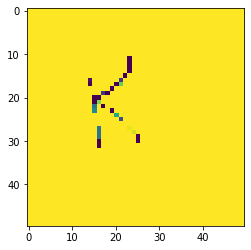

predicted label: [1.]
actual label: 1
The image is correctly classified


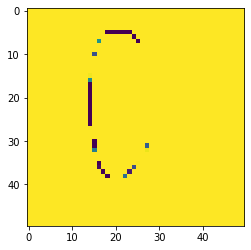

predicted label: [1.3475444e-05]
actual label: 0
The image is correctly classified


In [13]:
#This codeblock runs cnn1

import matplotlib.pyplot as plt
arr = model.predict(x_test)
print(len(arr))
for count in range(len(arr)):
  plt.imshow(x_test[count].reshape(50,50))
  plt.show()
  predicted = arr[count]
  actual = y_test[count]
  print("predicted label:",predicted)
  print("actual label:",actual)
  if((actual==0 and (predicted<=0.5 and predicted>=0)) or (actual==1 and (predicted>=0.5 and predicted<=1))):
    print("The image is correctly classified")
  else:
    print("The image is misclassified")

In [14]:
#experiment cnn 2
#idea from lecture slide 24

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)
callback = EarlyStopping(monitor='val_loss', patience=5)

model = Sequential()

model.add(Conv2D(64,(3,3),input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3)))
model.add(Dense(20,activation = 'softmax'))
model.add(Dense(200,activation = 'relu'))
#model.add(Dense(200,activation = 'relu'))

model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
              optimizer="adam",metrics=['accuracy'])

model.fit(x_train, y_train,batch_size=20,epochs=30,validation_data=(x_test,y_test),verbose=2)

Epoch 1/30
3/3 - 1s - loss: 0.7020 - accuracy: 0.4340 - val_loss: 0.6998 - val_accuracy: 0.4286
Epoch 2/30
3/3 - 0s - loss: 0.6949 - accuracy: 0.4528 - val_loss: 0.6923 - val_accuracy: 0.5714
Epoch 3/30
3/3 - 0s - loss: 0.6926 - accuracy: 0.4906 - val_loss: 0.6925 - val_accuracy: 0.4286
Epoch 4/30
3/3 - 0s - loss: 0.6933 - accuracy: 0.5660 - val_loss: 0.6918 - val_accuracy: 0.4286
Epoch 5/30
3/3 - 0s - loss: 0.6910 - accuracy: 0.5283 - val_loss: 0.6809 - val_accuracy: 1.0000
Epoch 6/30
3/3 - 0s - loss: 0.6817 - accuracy: 0.6792 - val_loss: 0.6553 - val_accuracy: 1.0000
Epoch 7/30
3/3 - 0s - loss: 0.6634 - accuracy: 0.8302 - val_loss: 0.6156 - val_accuracy: 1.0000
Epoch 8/30
3/3 - 0s - loss: 0.6274 - accuracy: 0.8679 - val_loss: 0.5836 - val_accuracy: 1.0000
Epoch 9/30
3/3 - 0s - loss: 0.5947 - accuracy: 0.9057 - val_loss: 0.5124 - val_accuracy: 1.0000
Epoch 10/30
3/3 - 0s - loss: 0.5387 - accuracy: 0.8868 - val_loss: 0.4588 - val_accuracy: 1.0000
Epoch 11/30
3/3 - 0s - loss: 0.4934 - a

14


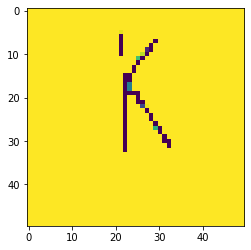

predicted label: [0.98749113]
actual label: 1
The image is correctly classified


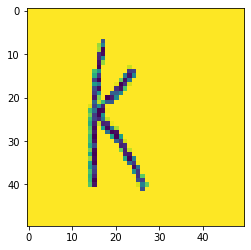

predicted label: [0.9995672]
actual label: 1
The image is correctly classified


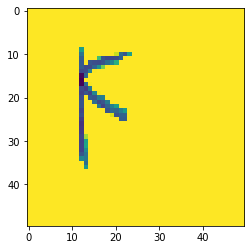

predicted label: [0.99237156]
actual label: 1
The image is correctly classified


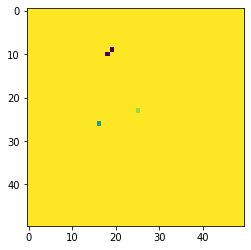

predicted label: [0.08807969]
actual label: 0
The image is correctly classified


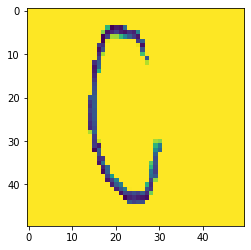

predicted label: [1.0070508e-05]
actual label: 0
The image is correctly classified


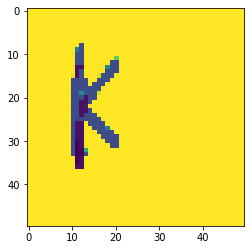

predicted label: [0.9997409]
actual label: 1
The image is correctly classified


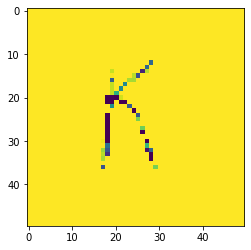

predicted label: [0.9995942]
actual label: 1
The image is correctly classified


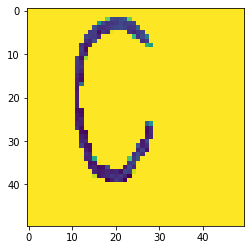

predicted label: [5.1137914e-07]
actual label: 0
The image is correctly classified


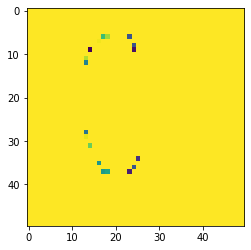

predicted label: [4.1841293e-05]
actual label: 0
The image is correctly classified


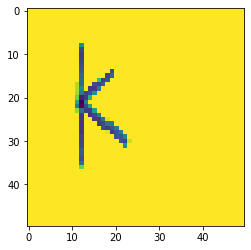

predicted label: [0.9996538]
actual label: 1
The image is correctly classified


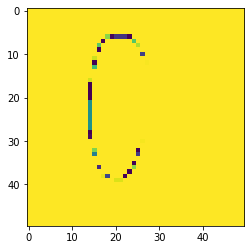

predicted label: [1.2272363e-05]
actual label: 0
The image is correctly classified


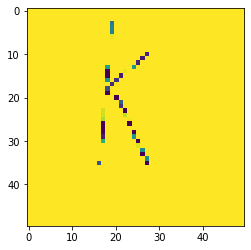

predicted label: [0.99903667]
actual label: 1
The image is correctly classified


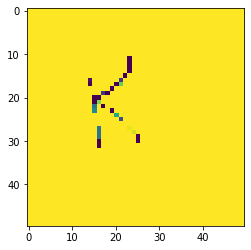

predicted label: [0.9999667]
actual label: 1
The image is correctly classified


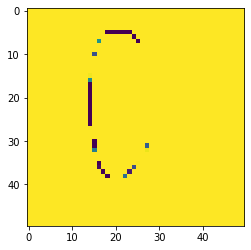

predicted label: [1.5828385e-06]
actual label: 0
The image is correctly classified


In [15]:
#part j) images can be misclassified due to overfitting
#overfitting occurs when weights become too specific to a particular set of data
#the neural network becomes overaccurate due to which it does not fit well to the test data

#This codeblock runs cnn2

import matplotlib.pyplot as plt
arr = model.predict(x_test)
print(len(arr))
for count in range(len(arr)):
  plt.imshow(x_test[count].reshape(50,50))
  plt.show()
  predicted = arr[count]
  actual = y_test[count]
  print("predicted label:",predicted)
  print("actual label:",actual)
  if((actual==0 and (predicted<=0.5 and predicted>=0)) or (actual==1 and (predicted>=0.5 and predicted<=1))):
    print("The image is correctly classified")
  else:
    print("The image is misclassified")